In [1]:
import numpy as np;
import matplotlib.pyplot as plt
from astropy.io import fits
import math
from scipy.optimize import curve_fit
import glob
import os
import sys
import matplotlib.backends.backend_pdf
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from scipy.stats import lognorm
from scipy import linalg
import pprint
import re
plt.rc('font', family='serif')
from matplotlib import rc
import pandas as pd
from astropy import constants as const
from astropy import units as units
from IPython.display import Markdown as md
import sympy
import pandas
from sympy import integrate, diff, sqrt, cos, sin, pi, exp, log
from sympy.abc import * 
i = sqrt(-1)
import numpy as np
import sympy.printing as printing
latp = printing.latex
hbar = sympy.symbols("hbar", real=True)
import mpmath 
import plotly.express as px
hbar

hbar

Where $B$ is the spectral radiance and $f$ is the frequency, we have Planck's law of Blackbody Radiation. We will be using CGS units.

In [2]:
def B(T, l, number = False, dps=50):
    if number:
        mpmath.mp.dps = dps
        k_B = const.k_B.value
        h = const.h.value
        c = const.c.value
        T = mpmath.mpmathify(T)
        return 2*h* ( ( c / l )**3 ) / (
            c**2 * (mpmath.exp(h * c/ (l * k_B * T)) - 1))
    else:
        k_B, h, c = sympy.symbols("k_B h c")
        return 2*h* ( ( c / l )**3 ) / (
            c**2 * (exp(h * c/ (l * k_B * T)) - 1))
md("We have the Planck Blackbody Law" + "\\begin{equation} B_l = " + latp(B(T,c/v))
   + "\\end{equation}")

We have the Planck Blackbody Law\begin{equation} B_l = \frac{2 h v^{3}}{c^{2} \left(e^{\frac{h v}{T k_{B}}} - 1\right)}\end{equation}

In [3]:
from sympy.plotting import plot
def plot_planck(T):
    wavelengths = np.linspace(350 * 10**-9, 1600 * 10**-9, 10**4)
    radiances = [float(B(T, l, True)) for l in wavelengths]
    yname =  "Spectral Radiance (W/(Hz sr m m))"
    df = pandas.DataFrame([wavelengths, radiances]).transpose()
    df.columns = ["Wavelength (m)", yname]
    fig = px.scatter(df, x="Wavelength (m)", y = yname, 
                      title = "Planck Function for " + str(T) + " Kelvin Ideal Blackbody")
    fig.write_html(str(T) + "blackbody_plot.html")
    plt.figure(dpi = 800)
    plt.scatter(wavelengths, radiances)
    plt.xlabel("Wavelength (m)")
    plt.grid(which='minor', axis='both', visible=True)
    plt.grid(which='major', axis='both', visible=True)
    plt.ylabel("Spectral Radiance (W Hz$^{-1}$ sr$^{-1}$ m$^2$)") 
    plt.title(str(T) + " Kelvin Ideal Blackbody")
    return plt
    '''
    plot(b_fun, xlim = (350 * 10**-9, 1600 * 10**-9), ylim=(.9,10),
        adaptive = False, nb_of_points = 10**8, yscale="log", xlabel = "Wavelength (nm)",
        title = "Planck Function for Blackbody at " + str(T) + " Kelvin",
        ylabel = "Spectral Radiance (W Hz$^{-1}$ sr$^{-1}$ m$^2$)")
    '''

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

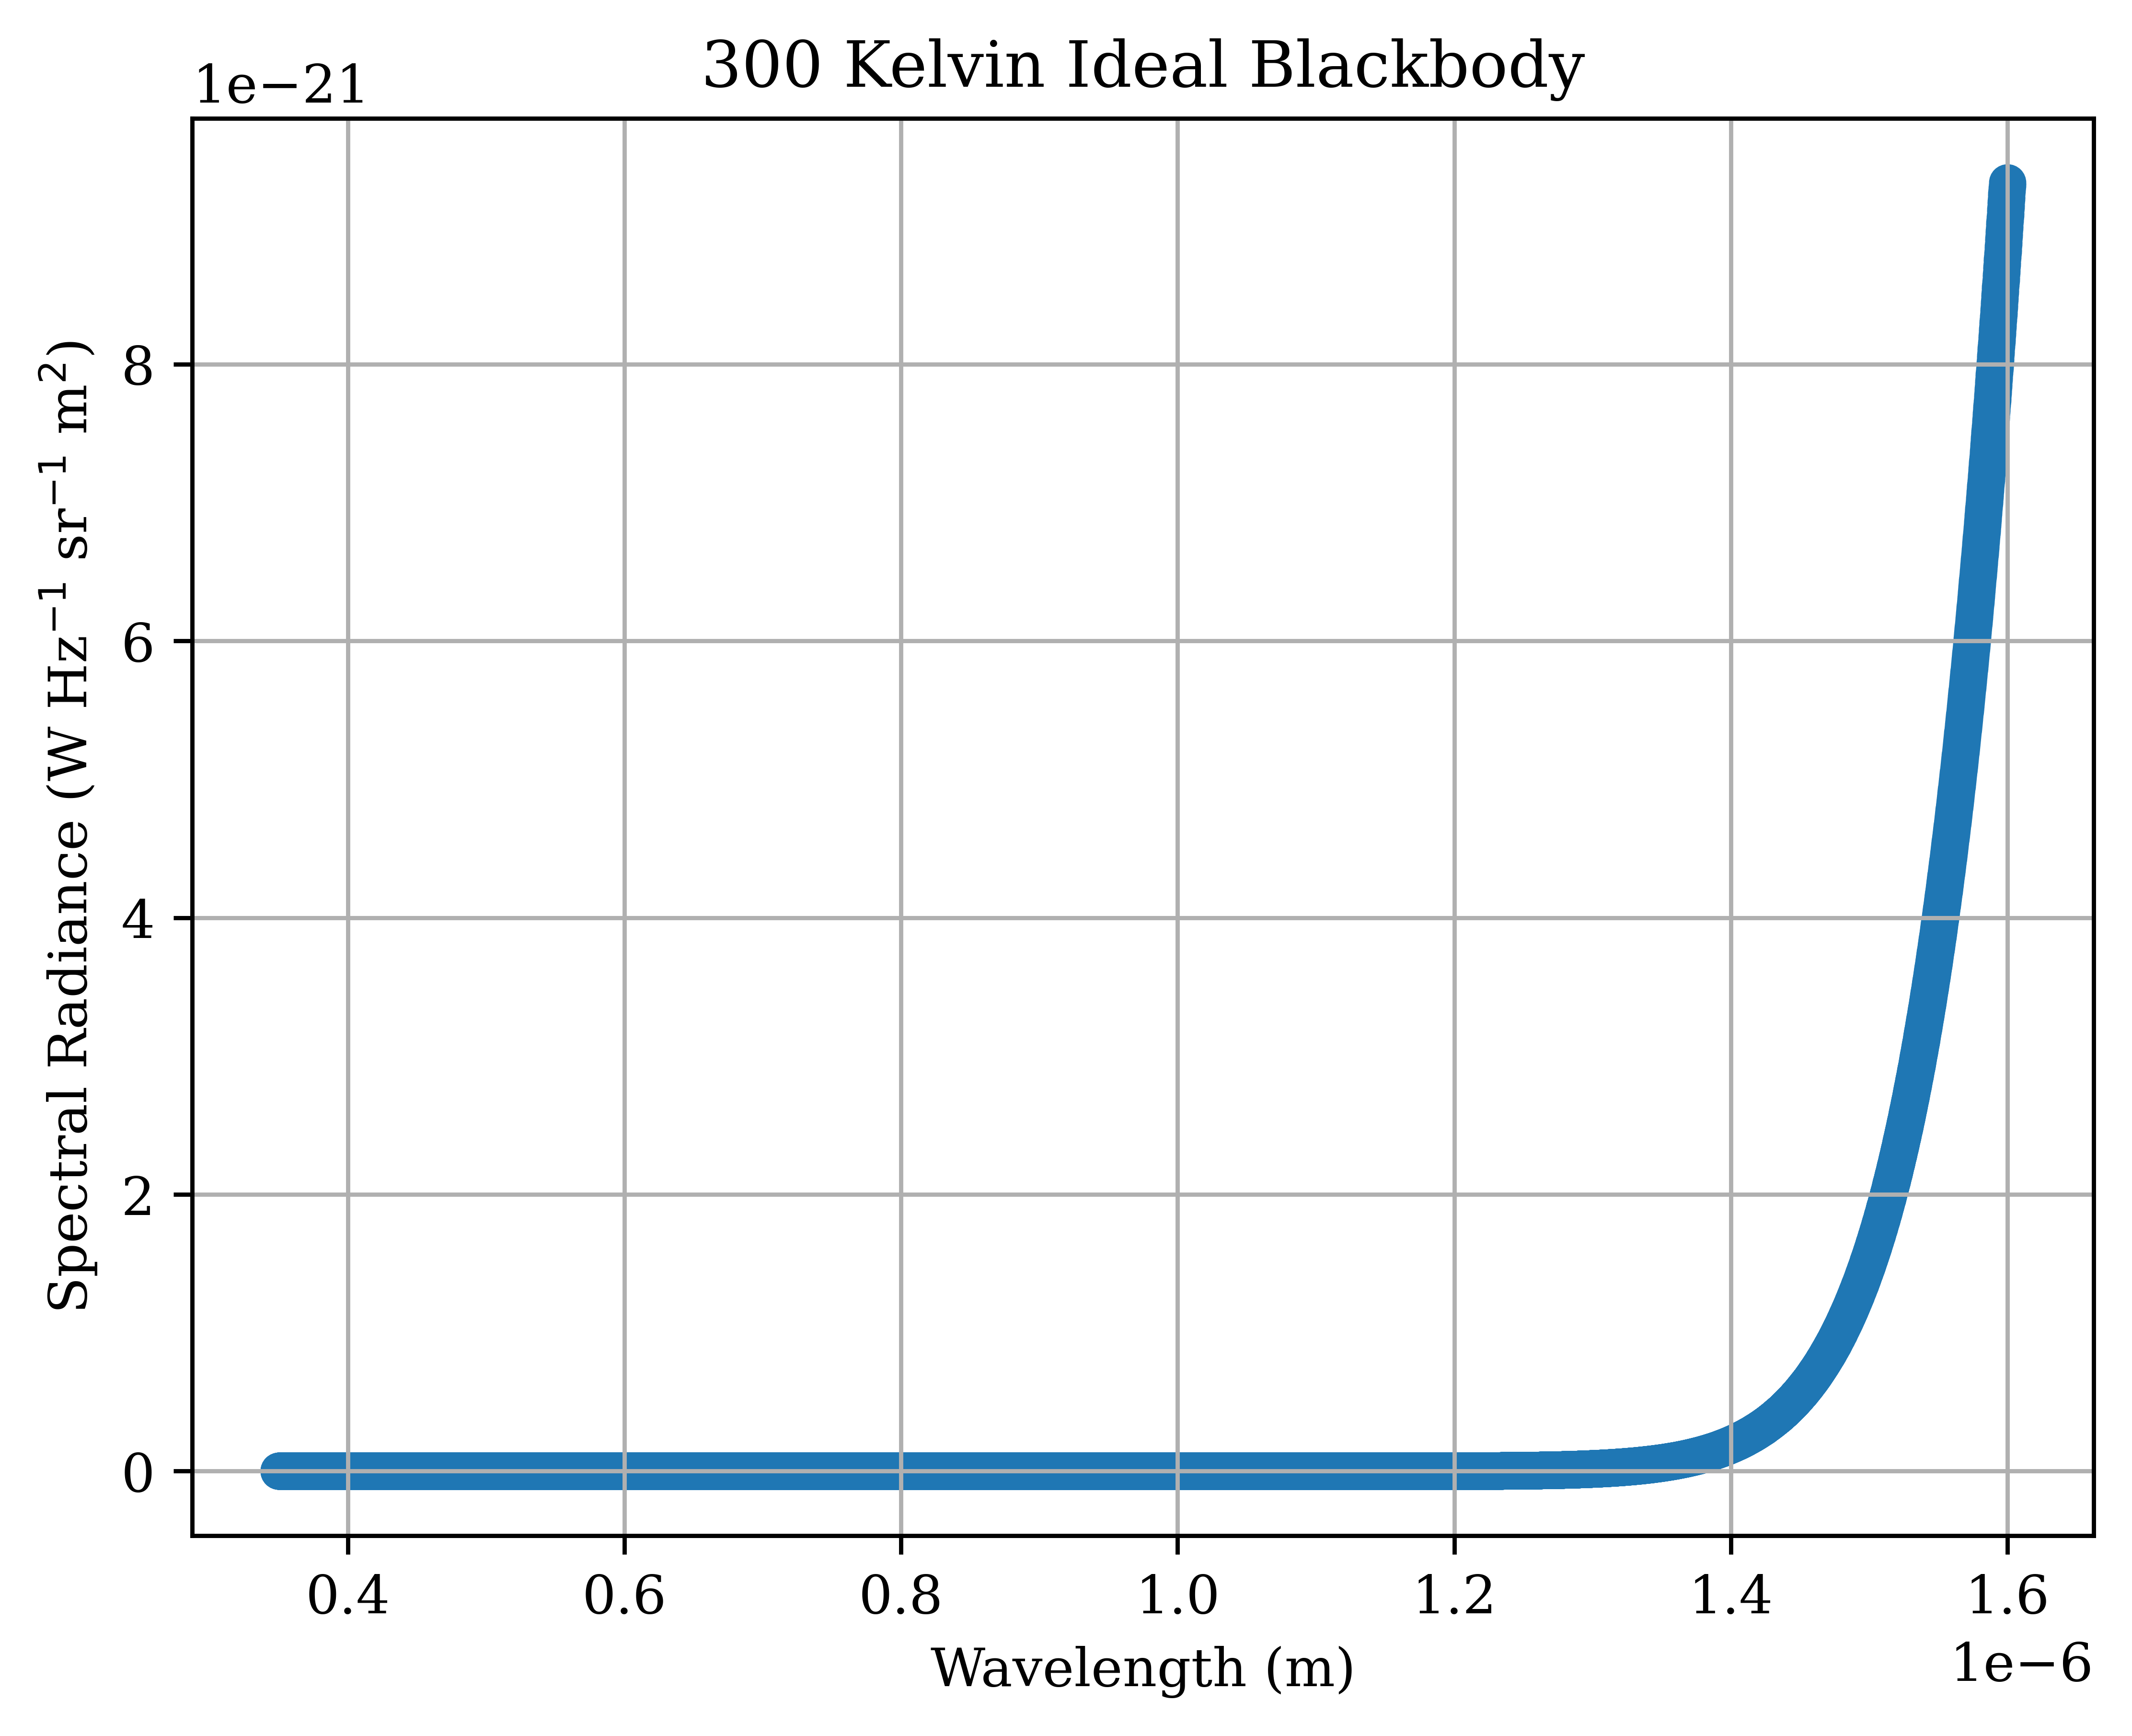

In [4]:
plot_planck(300)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

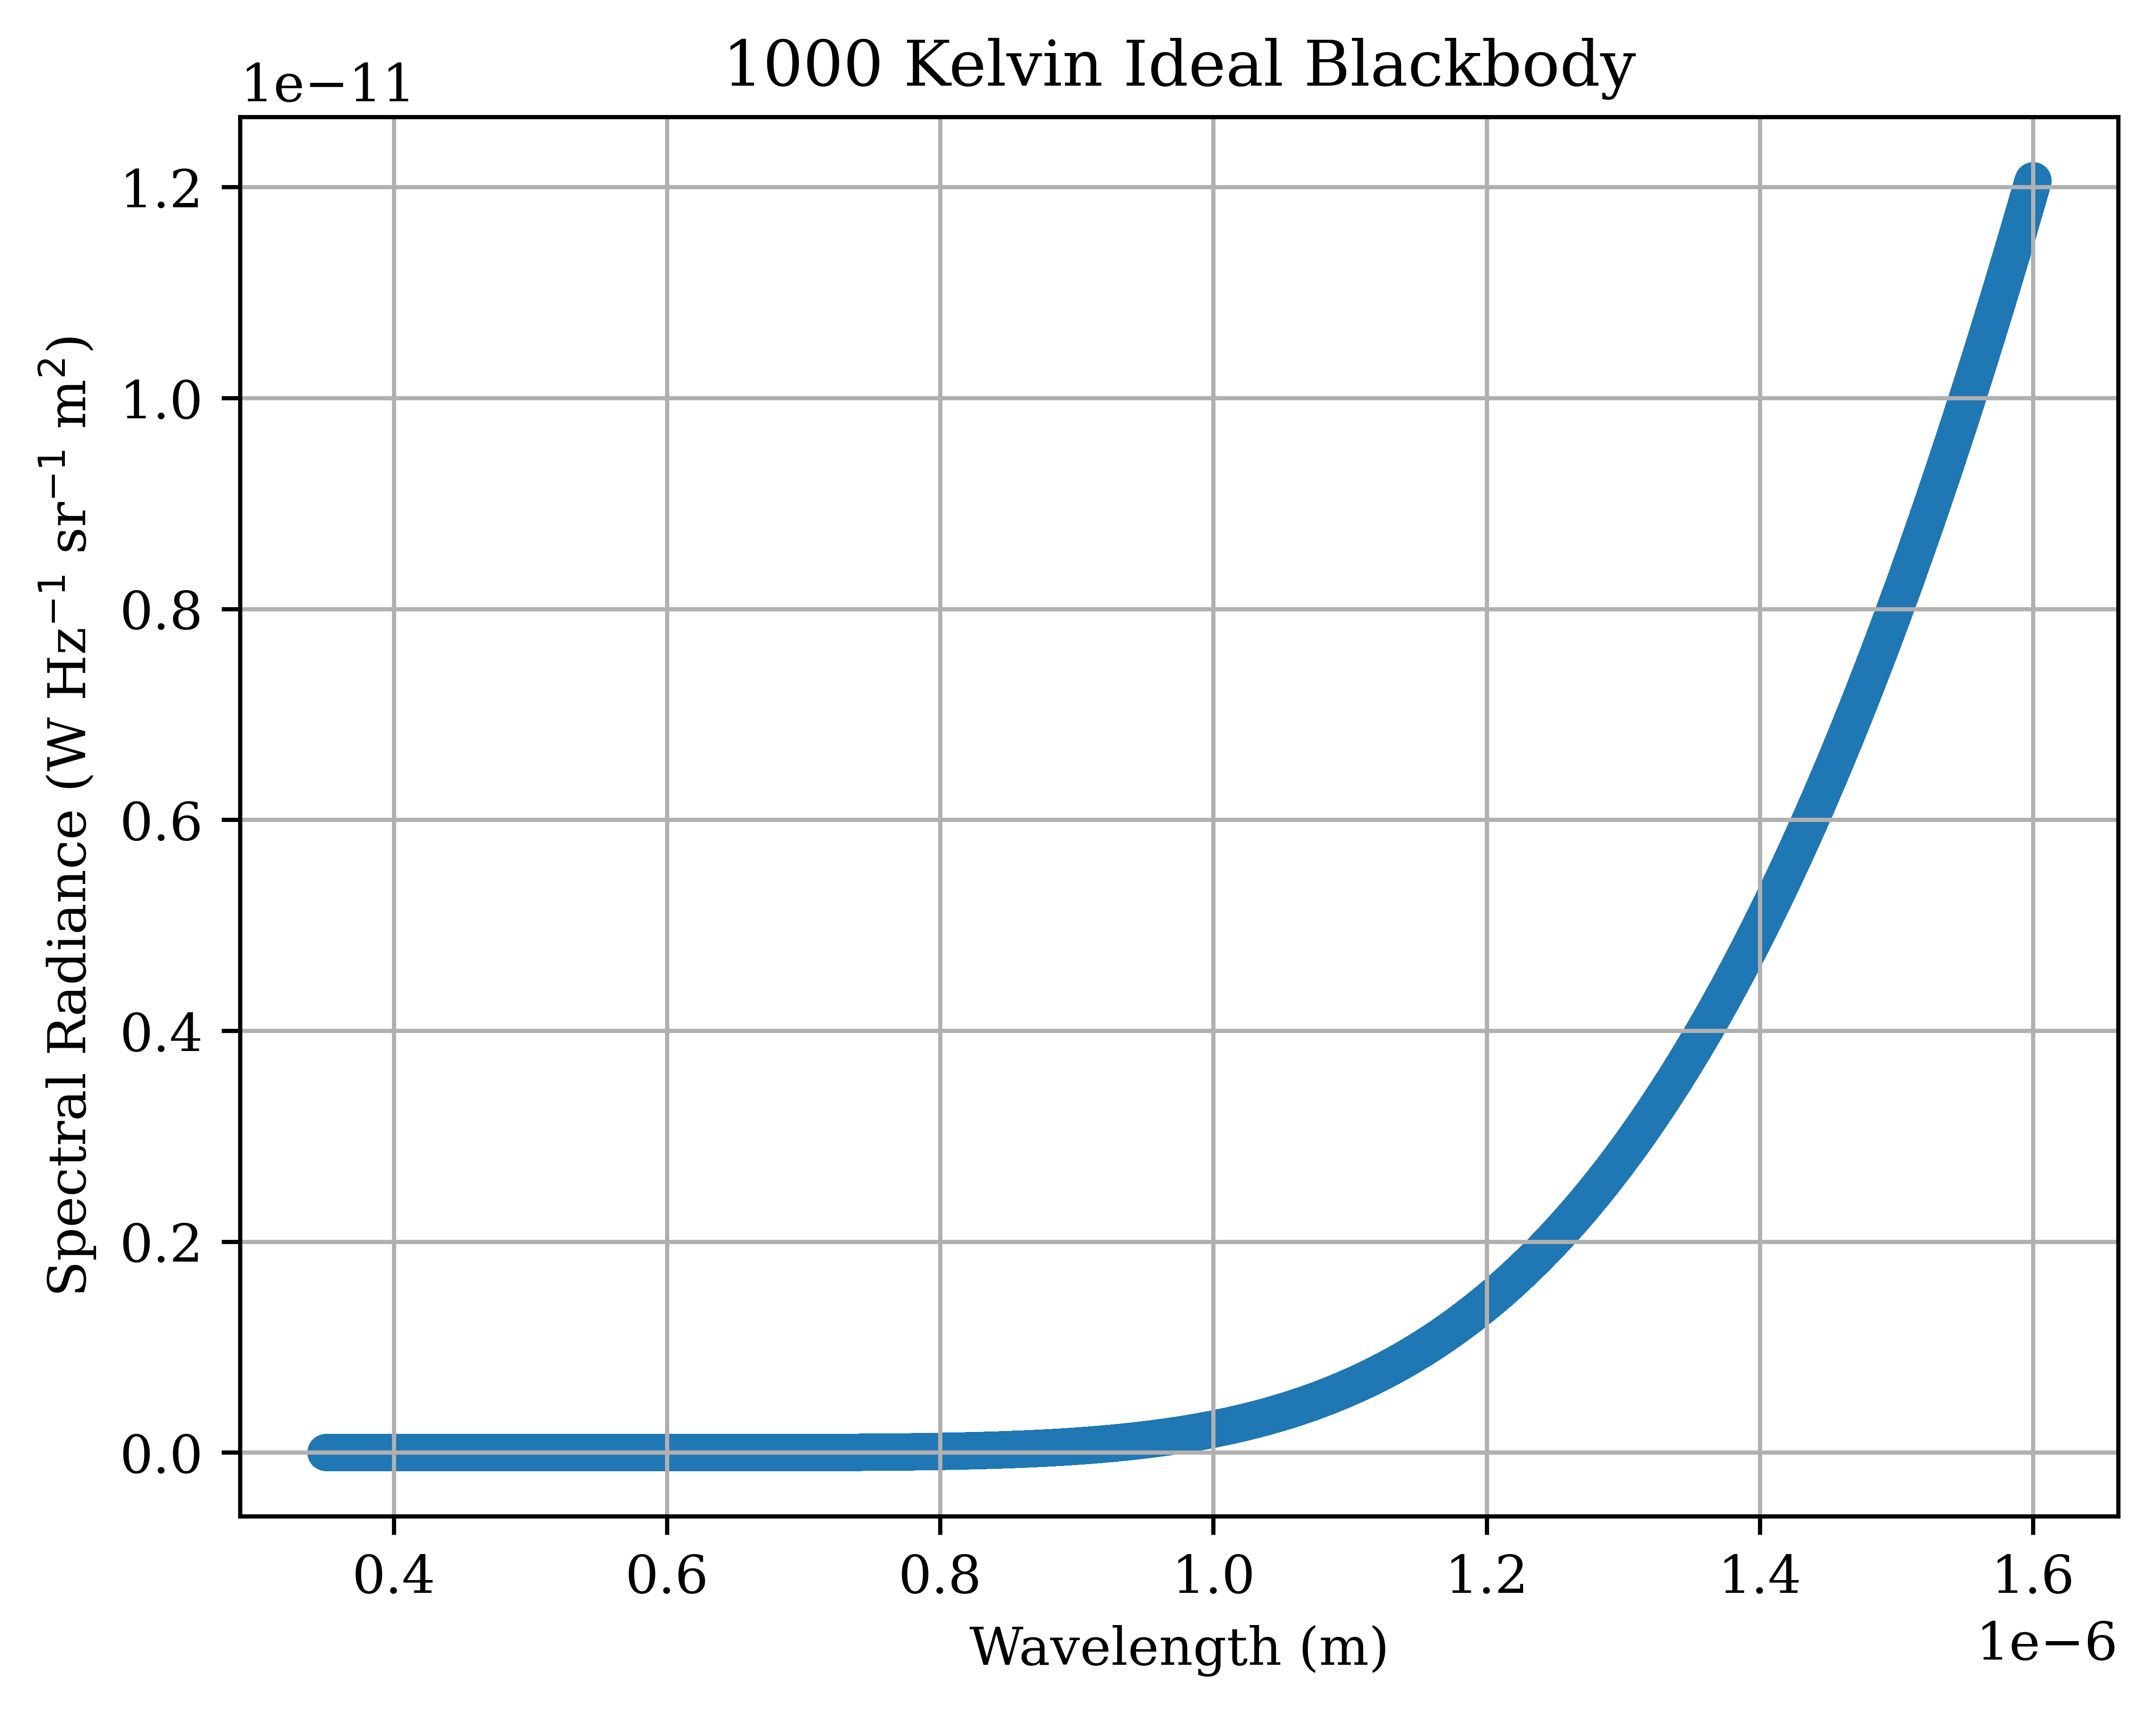

In [5]:
plot_planck(1000)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

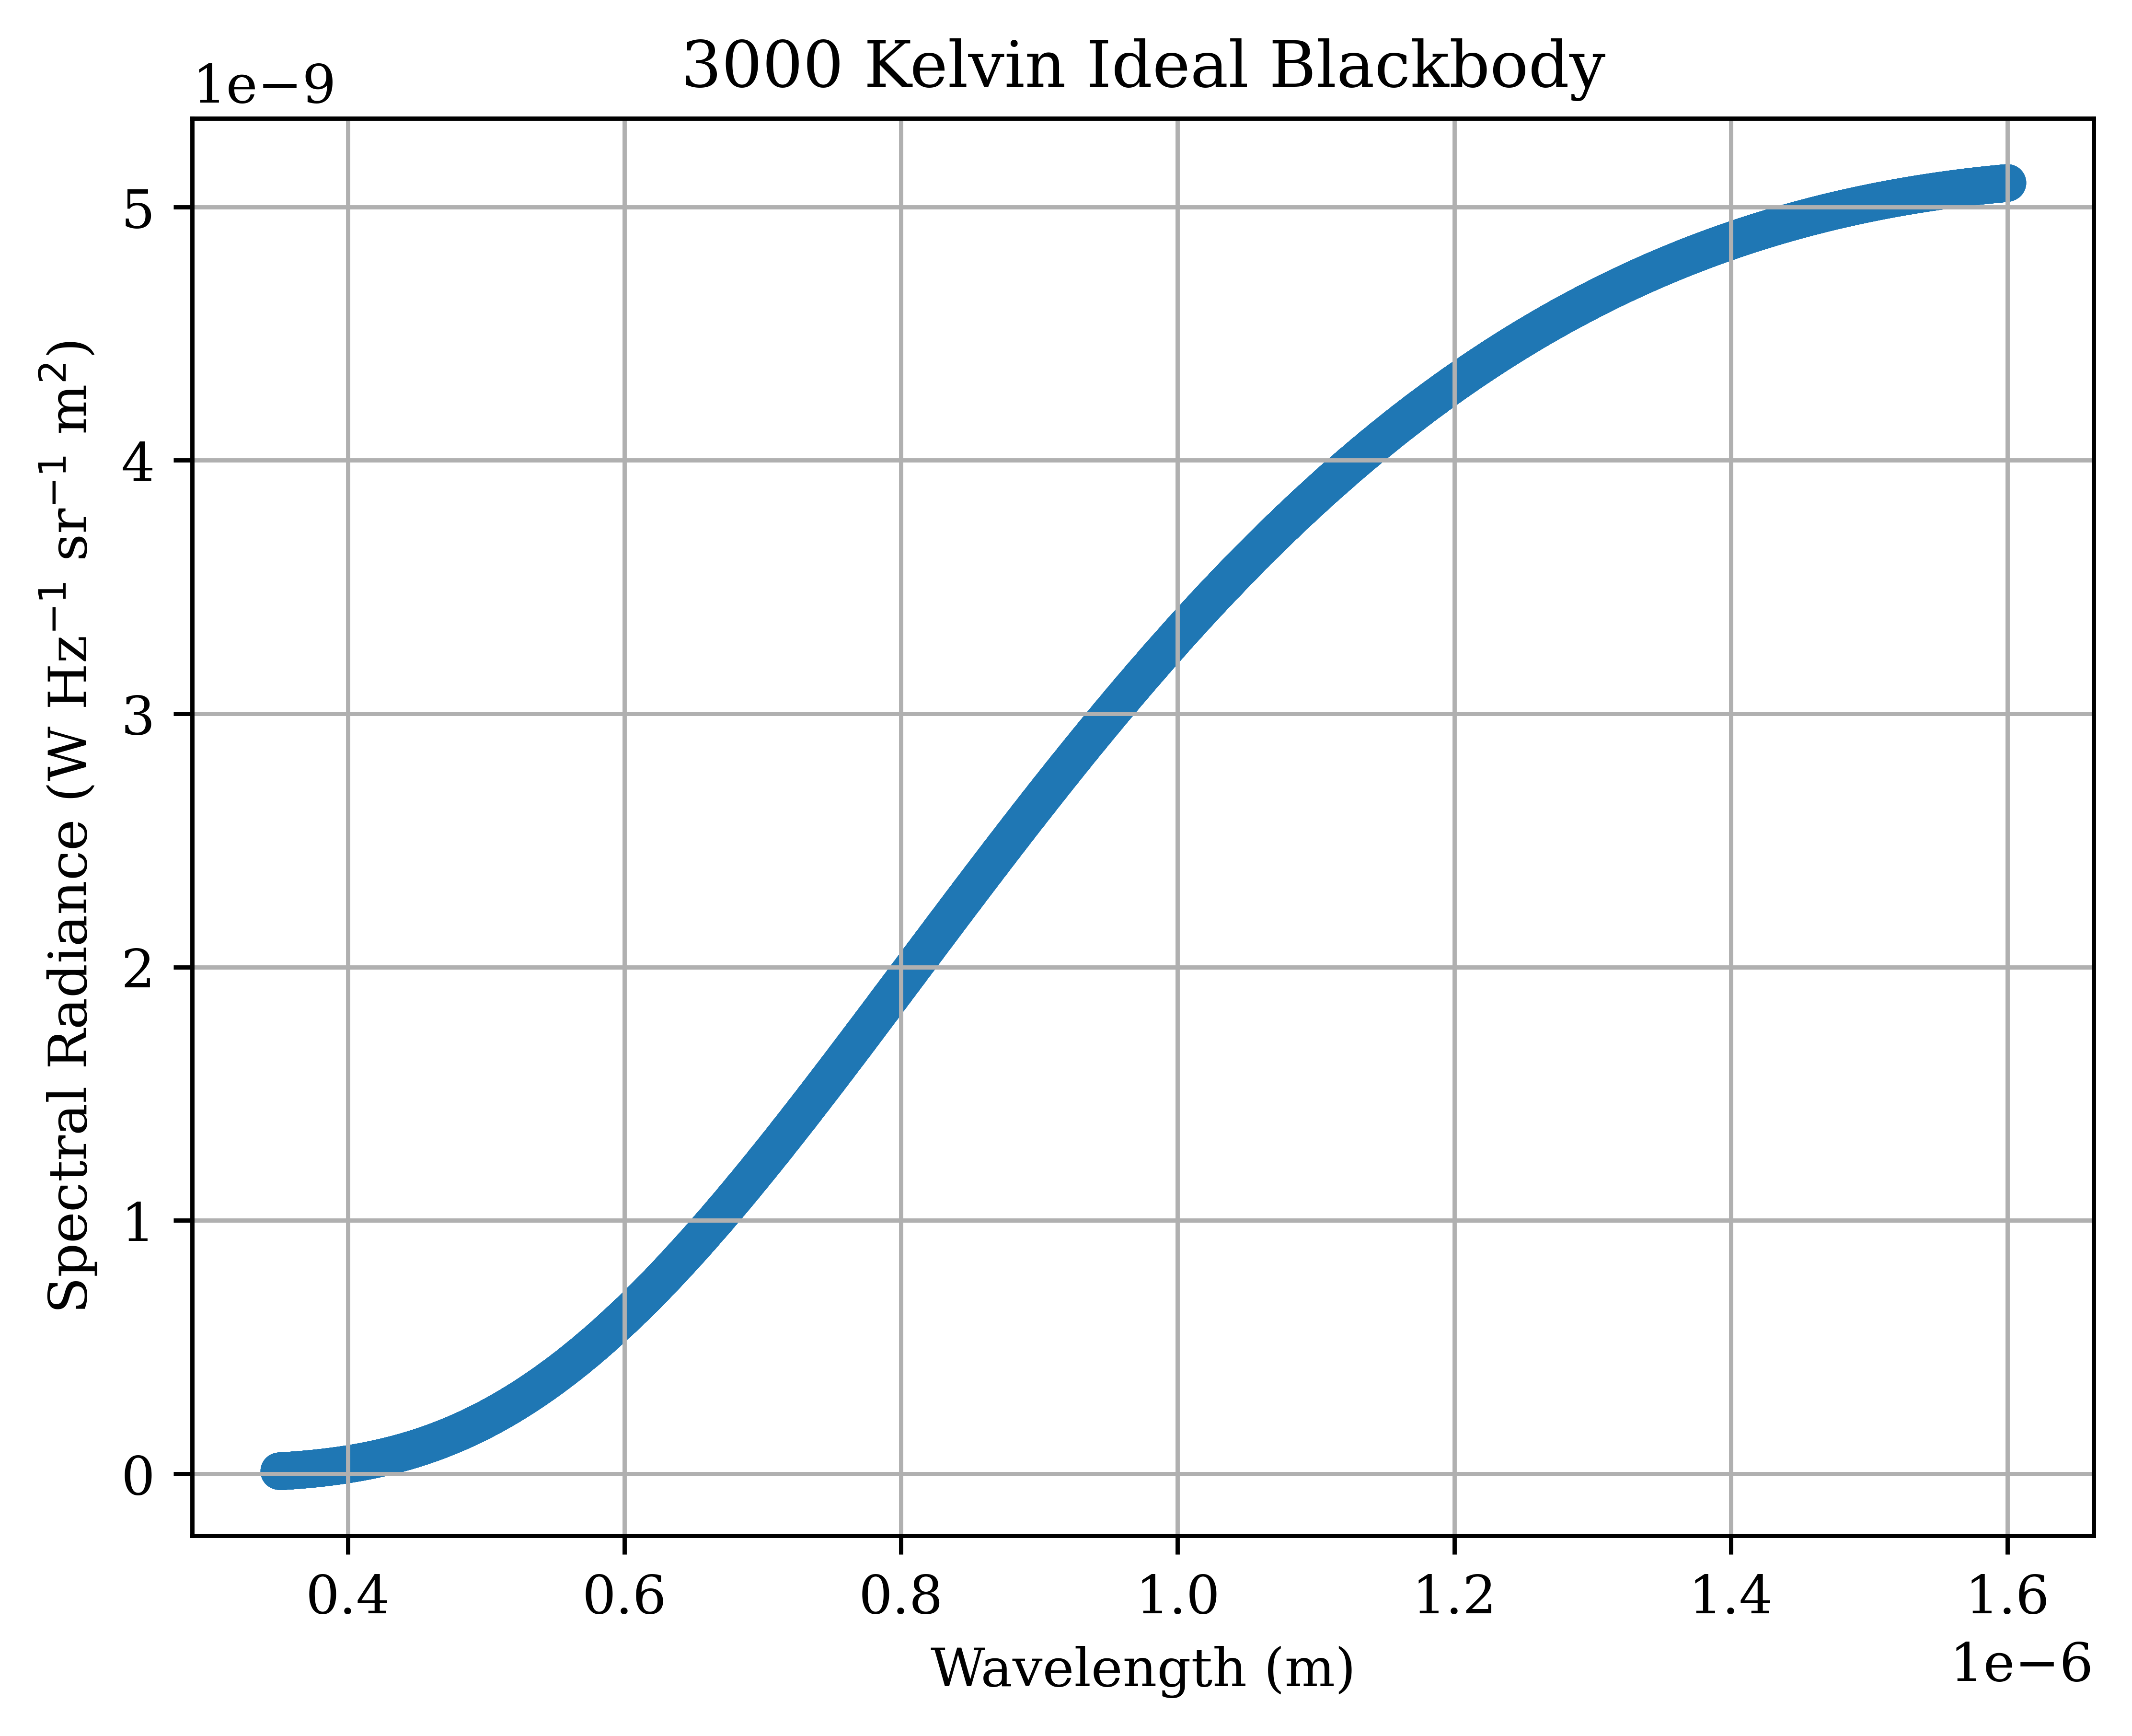

In [6]:
plot_planck(3000)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

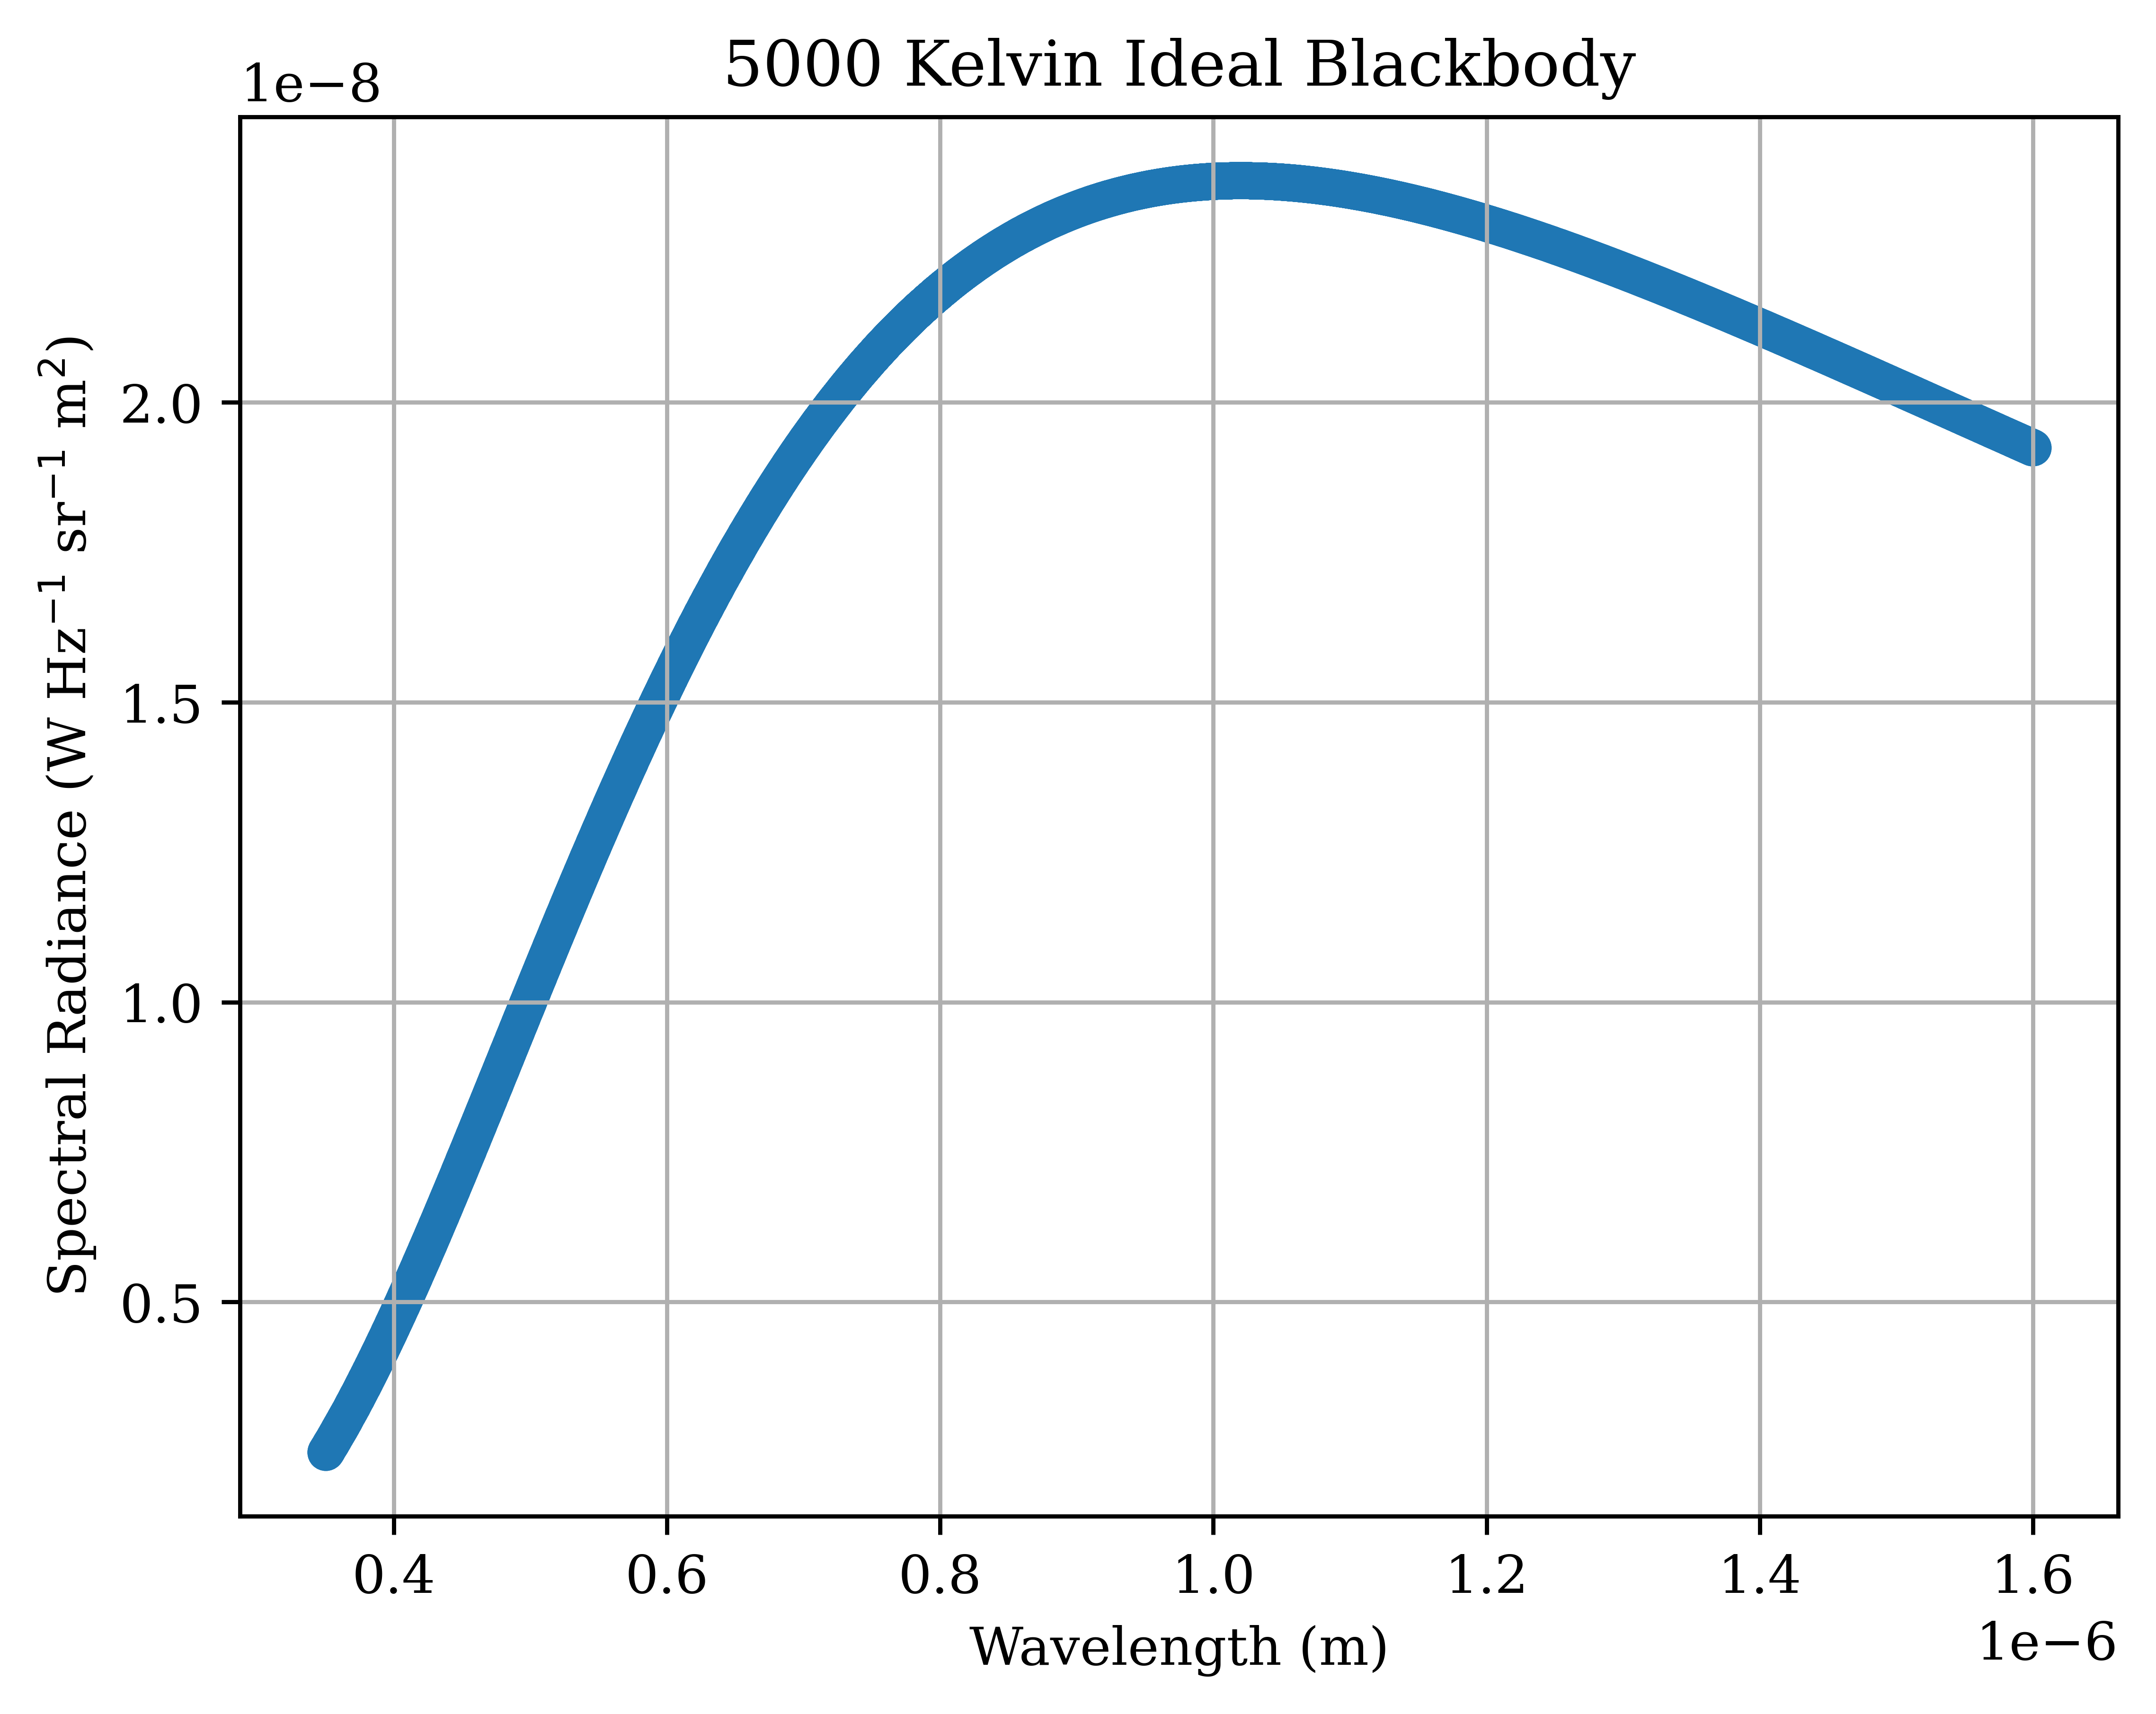

In [7]:
plot_planck(5000)

In [8]:
temp_list = [300, 1000, 3000, 5000]
for T in temp_list:
    peak = (3 * units.mm / T).to(units.m).value
    print(mpmath.log10(peak), mpmath.log10(B(T, peak, True)))

-4.9999999999999999644733850823019973008295631257525 -11.480132488738328539155182878367842691858105964728
-5.5228787452803375517024728445662672420376910518749 -9.9114962528973159081789007475600640111092417400786
-6.0000000000000000196526453297206160616919506824173 -8.4801324887383286630048454686219256681457103788396
-6.2218487496163563871438785317410077257236319367645 -7.8145862398892592686797972725455481807151190300996


\section{Aprill 11, 2023}
Recording data here to be printed out later and turned in with the report. 

\underline{Lecture Notes}
Notebook management and safety! Lab 1: as expected from the materials, carefully measure the output from a blackbody with a photodiode. 211 is bad luck for projecting. 8 Labs/exercises total which will be in Room B129 after a short lecture in 211. Emphasis on good notebook practice. Final lab notebook due at the end of the course. 10% grade on intro lecture, 50% based on notebook and reports. 40% based on the lab itself. Data can be shared within the group but the write-up must be your own. Must be clear and coherent, but not necessarily polished. You can email Emily the TA via email on Mondays at 5PM. 

\subsection{Notebook Guidelines}
Introduction, Equipment, Measurements, Data Analysis, Interpretation and Discussion, Summary and Conclusion. 

This week we're using a quartz lamp, a set of filters, and will measure the photoinsity of the lamp with a photodiode as a function of wavelength to determine if it's a blackbody spectrum. Describe what equipment was set up and why, sketch the layout, and don't just transcribe the lab handout. Record what you actually used in the lab environment. The interference filter assumes light in collimated space! Use a scale of the operation of the optics and why. Christoff Bernick works on optical instrumentation in Hawaii. Indicate uncertainty measurements whenever possible and reasonable!! Check your measured values against expectations! Describe any problems that occured (you won't get penalized for these specifically)! Don't erase anything (you might have been right the first time!). Show tables and plots where appropriate. Here, the photointensity will be a function of wavelength and angle. Pay attention to significant figures when appropriate. You should be spending no more than 3-4 hours writing up the report. Include the code written to plot things, and any information that helped determine the signal to noise can be included.  What do your results mean? Are they consistent with your explanation, and why or why not? This will be the bulk of the report. How could the lab be improved? What did you learn? Interpretation and discussion is to be done at home. Summarize your results rather than your expectation. 
